In [2]:
import pandas as pd
import seaborn as sn
import statistics as sts

In [7]:
data = pd.read_csv("D:\DADOS\Churn.csv", sep=";")

In [4]:
#data.head()
#data.shape

data.columns = ['Id', 'Score', "Estado", "Genero", "Idade", "Patrimonio", "Saldo", "Produtos",
                 "TemCartCredito", "Ativo", "Salario", "Saiu"]

In [5]:
data.head() # Dados de uma Instituição Financeira
# É importante conhecer a regra de negócio

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


<AxesSubplot:xlabel='Estado'>

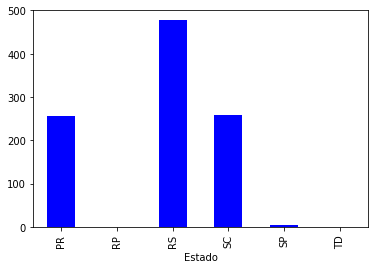

In [11]:
# Explorando dados Categóricos

estado = data.groupby(["Estado"]).size()
#print(estado)
estado.plot.bar(color = "blue") #plotando dados com gráfico em barras
# Vamos substituir os dados que não são do domínio pela Moda, o que mais aparece.

<AxesSubplot:xlabel='Genero'>

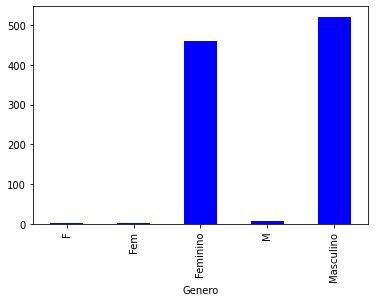

In [13]:
# Explorando o Genero
gen = data.groupby(["Genero"]).size()
gen.plot.bar(color = "blue")
# Temos que remover os valores que são da mesma categoria mas possuem nomes diferentes,
# fazer com que as categorias principais absorvam as de nome errado

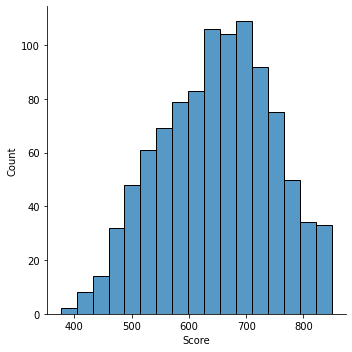

In [16]:
# Explorando dados Numéricos

#data["Score"].describe()

sn.displot(data["Score"])

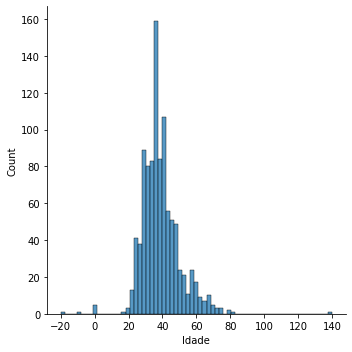

In [20]:
# Visualizando a Idade

#data["Idade"].describe()
sn.displot(data["Idade"])

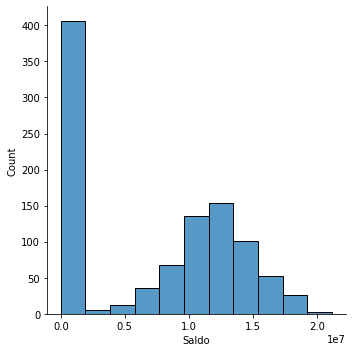

In [22]:
# Visualizando Saldo

data["Saldo"].describe()
sn.displot(data["Saldo"])

In [25]:
# Visualizando Salário

#data["Salario"].describe()
#sn.displot(data["Salario"])

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [27]:
# Resumo dos dados onde existem NA's
data.isnull().sum()
# Genero 8 dados NA's
# Salario 7 dados NA's

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [7]:
# Tratando dados Salario

#data["Salario"].describe()
mediana = sts.median(data["Salario"])
print(mediana)

# Substituindo os Valores NA's pela Mediana do grupo
data["Salario"].fillna(mediana, inplace=True)
# Verifica se ainda existem dados NA's
data["Salario"].isnull().sum()

70518.0


0

In [8]:
# Tratando dados Categóricos de Genero

genero = data.groupby(data["Genero"]).size()
genero
# Preencher os NA's com o Masculino pois é a Moda
data["Genero"].fillna('Masculino', inplace=True)

In [9]:
#data["Genero"].isnull().sum()
# Atribuindo valores "Masculino" no genero com categoria M
data.loc[data["Genero"] == 'M', "Genero"] = "Masculino"
data.loc[data["Genero"].isin(['F', 'Fem']), "Genero"] = "Feminino"

In [10]:
# Tratando a Idade

#data["Idade"].describe()
# Verificando Idades fora do Domínio
data.loc[(data["Idade"] < 0) | (data["Idade"] > 120)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [11]:
# Calculando a Mediana das Idades para substituir

med = sts.median(data["Idade"])
med

# Substituindo os dados fora do critério pela Mediana
data.loc[(data["Idade"] < 0) | (data["Idade"] > 120), "Idade"] = med
#data["Idade"].isnull().sum()

In [14]:
# Tratando Dados Duplicados

data[data.duplicated(["Id"], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [13]:
# Removendo dados duplicados

data.drop_duplicates(subset="Id", keep="first", inplace=True)
# subset="nome coluna"
# keep="mantem o primeiro" usando o first

In [17]:
# Estado Fora do Domínio

state = data.groupby(["Estado"]).size()
state

Estado
PR    257
RS    483
SC    258
dtype: int64

In [16]:
# Trocar os Estados de Domínio pela Moda, que no caso é o dado que mais se repete

data.loc[data["Estado"].isin(['SP', 'TD', 'RP']), "Estado"] = 'RS'

In [18]:
# Tratamento de Outliers - Usando desvio Padrão

desv = sts.stdev(data["Salario"])
desv

528988918.4679201

In [20]:
# Definir o padrão que estão acima de * 2 o desvio

data.loc[data["Salario"] >= 2 * desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [21]:
# Atualizar os Salarios acima do desvio padrão para mediana 

median = sts.median(data["Salario"])
median

8637195.5

In [22]:
data.loc[data["Salario"] >= 2 * desv, "Salario"] = median

In [23]:
data.loc[data["Salario"] >= 2 * desv]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [24]:
# Vai dar um valor diferente pois removemos uma linha com ID duplicado
data.shape

(998, 12)